# Laboratoire 1 - Analyse exploratoire des données (EDA)  
Mihai Trăscău (2023)  

L'objectif de ce laboratoire est d'acquérir quelques techniques d'exploration d'un ensemble de données. Les méthodes d'analyse que vous utiliserez vous aideront à identifier les particularités et les problèmes de l'ensemble de données, tels que :  
* Comprendre la composition de l'ensemble de données (attributs, valeurs et exemples)  
* Effectuer des statistiques (simples) sur l'ensemble de données  
* Détecter et traiter les données erronées ou manquantes  
* Visualiser les données (pour une meilleure compréhension)  
* Calculer les corrélations entre les attributs  

Tout cela vous aidera à garantir que votre ensemble de données est utilisable et à prendre une décision plus éclairée concernant les modèles d'apprentissage que vous utiliserez.  

## Les bibliothèques Numpy et Pandas  
Les bibliothèques les plus populaires (fournies sous forme de packages) en Python pour réaliser ce type d'analyse sont [Numpy](https://numpy.org/doc/stable/) et [Pandas](https://pandas.pydata.org/docs/reference/index.html).  
Numpy sert de modèle de base pour les matrices multidimensionnelles avec lesquelles vous travaillerez, tandis que Pandas met à disposition une gamme complète de méthodes d'analyse et de visualisation des données. La majorité des fonctions que vous utiliserez dans ce laboratoire proviennent de la bibliothèque _pandas_.  
En complément, vous utiliserez également des fonctions de visualisation (plus avancées) provenant de la bibliothèque Matplotlib ou de [Seaborn](https://seaborn.pydata.org/tutorial/introduction), qui est étroitement liée à _pandas_.  

## L’ensemble de données  
Vous travaillerez avec l’ensemble de données [Heart Disease](https://archive.ics.uci.edu/ml/datasets/heart+disease) de la collection UCI. Il contient des informations sur des patients souffrant (ou non) de maladies cardiaques. Les attributs de l’ensemble de données sont, dans l’ordre :  
1. _age_ - âge  
2. _sex_ - sexe biologique du patient (1 pour homme et 0 pour femme)  
3. _cp_  - type de douleur thoracique  
4. _trestbps_ - tension artérielle au repos (en mm/Hg)  
5. _chol_ - cholestérol sérique (en mg/dl)  
6. _fbs_ - glycémie supérieure à 120 mg/dl  
7. _restecg_ - résultats de l’électrocardiogramme  
8. _thalach_ - fréquence cardiaque maximale  
9. _exang_ - douleurs induites par l'exercice (1 pour oui, 0 pour non)  
10. _oldpeak_ - différence ECG entre le test d’effort et le repos  
11. _slope_ - pente de l'ECG lors du test d'effort  
12. _ca_ - nombre de vaisseaux majeurs colorés par fluoroscopie  
13. _thal_ - type de thalassémie (maladie du sang)  
14. _target_ - diagnostic de la sévérité du rétrécissement des vaisseaux sanguins 

In [3]:
# Chargement des bibliothèques

# Structures de données et outils d'analyse 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [4]:
# On charge les données
data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
dataset = pd.read_csv(data_link)

---
#### Exigence 1 [0p]
Affichez les 5 premiers exemples du jeu de données pour les inspecter.  
_(ASTUCE : utilisez la variable **dataset** ci-dessus et des méthodes de pandas)._


In [5]:
dataset[0:4]

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


---
#### Exigence 2 [0.5p]
En observant le problème lié aux colonnes, renommez-les pour qu'elles soient plus faciles à manipuler par la suite. Affichez ensuite à nouveau les 5 premiers exemples.

In [6]:
dataset.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dataset[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


---
#### Exigence 3 [0p]
Trouvez le nombre d'exemples dans le jeu de données.

In [7]:
len(dataset)

302

---
#### Exigence 4 [0.5p]
Trouvez, pour chaque attribut, les métriques d'intérêt suivantes :
* le nombre d'exemples sans valeurs manquantes,
* la valeur moyenne,
* l'écart type des valeurs,
* la valeur minimale,
* la valeur du 1er quartile (25% des valeurs sont en dessous),
* la valeur de la médiane (50% des valeurs sont en dessous),
* la valeur du 3ème quartile (75% des valeurs sont en dessous),
* la valeur maximale.

_(ASTUCE : Une seule méthode de pandas suffit.)_

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


---
#### Exigence 5 [0.5p]
Affichez des informations sur le type de données et le nombre d'exemples avec des valeurs non nulles pour chaque attribut.

In [9]:
dataset.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

---
#### Exigence 6 [0.5p]
Vérifiez combien d'exemples contiennent des valeurs nulles (NaN) pour chaque attribut.

In [10]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

---
#### Exigence 7 [1p]
Identifiez les attributs contenant des symboles autres que des valeurs numériques et affichez les exemples concernés en les concaténant dans un unique _DataFrame_ pandas (sans doublons).


In [11]:
non_numeric_columns = dataset.select_dtypes(exclude='number').drop_duplicates()
non_numeric_columns



,ca,thal
0,3.0,3.0
1,2.0,7.0
2,0.0,3.0
5,2.0,3.0
7,1.0,7.0
8,0.0,7.0
9,0.0,6.0
11,1.0,6.0
39,3.0,7.0
47,1.0,3.0


---
#### Exigence 8 [1p]
Le traitement des valeurs manquantes ou inconnues est crucial pour l'application ultérieure des méthodes d'apprentissage. Remplacez les symboles non numériques identifiés à l'étape précédente par la valeur la plus fréquente de l'attribut concerné.

In [12]:
def replace_not_numbers(df):
    for col in df:
        # transform not numbers in NAN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Get most used value (moda) .
        moda = df[col].mode()[0]
        
        # Replace NaN).
        df.fillna({col: moda}, inplace=True)
    
    return df

df_clean = replace_not_numbers(dataset)
df_clean.dtypes



age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

---
#### Exigence 9 [0.5p]
Les histogrammes permettent de visualiser la distribution (fréquence) des valeurs des attributs du jeu de données. Les attributs continus sont discrétisés en « bins » avant d’être affichés.

Text(0, 0.5, 'Nombre')

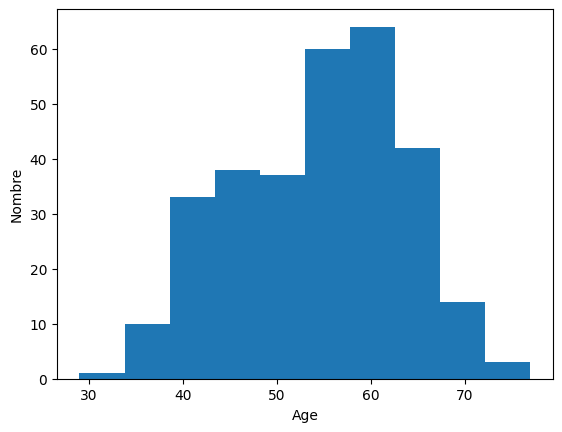

In [13]:
dataset.age.plot.hist()
plt.xlabel("Age")
plt.ylabel("Nombre")

---
#### Exigence 10 [1p]
Tracez l'histogramme de l'attribut _age_ pour les intervalles suivants :  
0-18, 18-35, 35-45, 45-55, 55-65 et 65+.

_(ASTUCE : Ajustez également le paramètre width pour un affichage plus agréable)._

Text(0, 0.5, 'Nombre')

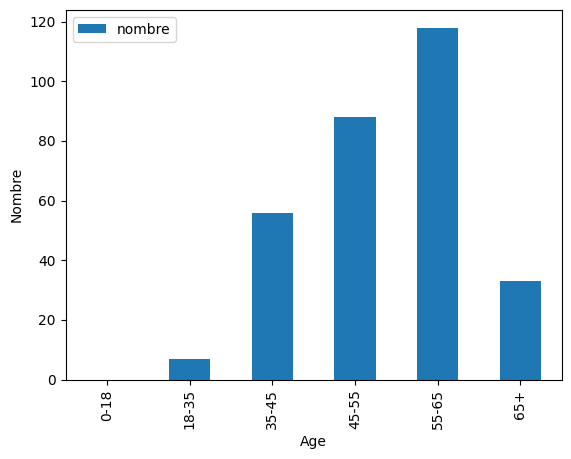

In [14]:

intervals = [0, 18, 35, 45, 55, 65, 1000] 
labels = ['0-18', '18-35', '35-45', '45-55', '55-65', '65+']
list = dataset.age.groupby(pd.cut(dataset.age, intervals), observed=False).count().to_list()
df = pd.DataFrame (dict(age=labels, nombre=list))
df.plot(x='age', kind = 'bar')
plt.xlabel("Age")
plt.ylabel("Nombre")




---
#### Exigence 11 [1p]
Tracez l'histogramme de l'attribut _target_ en fonction du sexe des patients. Conservez la même amplitude sur l'axe des fréquences pour les graphiques obtenus.

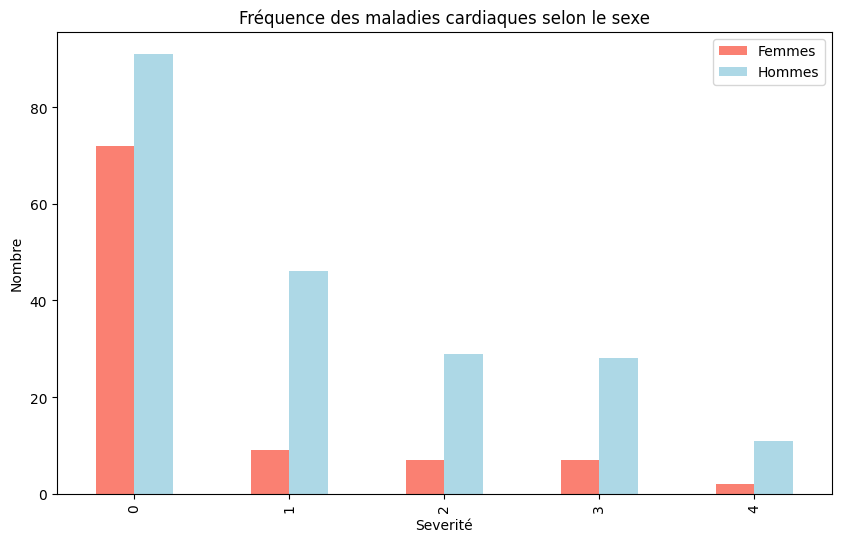

In [15]:
df = pd.crosstab(dataset.target, dataset.sex)
df.plot(kind='bar',figsize=(10, 6),color=['salmon', 'lightblue'])
plt.title("Fréquence des maladies cardiaques selon le sexe")
plt.xlabel("Severité")
plt.ylabel("Nombre")
plt.legend(["Femmes", "Hommes"])
        

---
#### Exigence 12 [1p]
Notre jeu de données contient des exemples de 5 classes de sévérité du diagnostic, mais nous nous intéressons uniquement à savoir si le diagnostic est positif ou négatif. Transformez l'attribut _target_ en un attribut binaire en remappant toutes les valeurs non nulles à _1_. Affichez ensuite l'histogramme de l'attribut ainsi modifié.


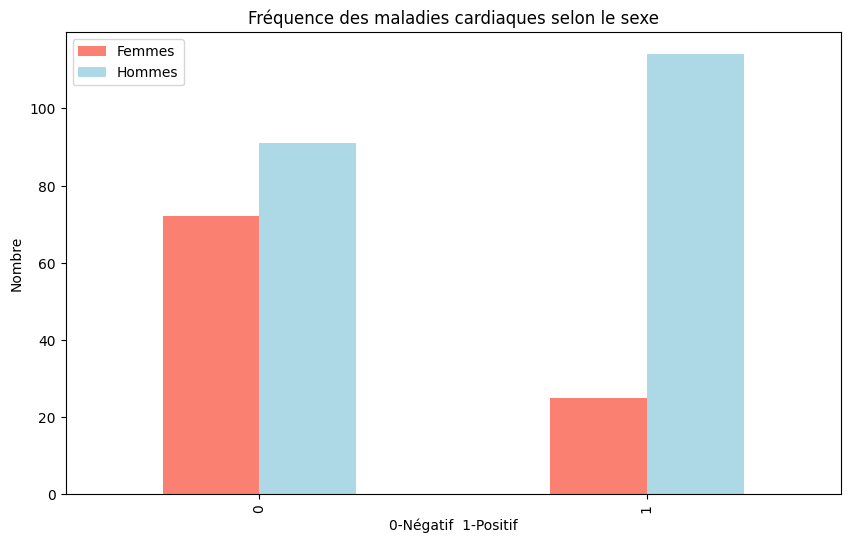

In [16]:
def normalizeTarget(x):
    if (x > 0):
        return 1
    return 0

# dataset.target.apply(normalizeTarget)
df = pd.crosstab(dataset.target.apply(normalizeTarget), dataset.sex) 
# df 
df.plot(kind='bar',figsize=(10, 6),color=['salmon', 'lightblue'])
plt.title("Fréquence des maladies cardiaques selon le sexe")
plt.xlabel("0-Négatif  1-Positif")
plt.ylabel("Nombre")
plt.legend(["Femmes", "Hommes"])

---
#### Exigence 13 [0.5p]
Les corrélations décrivent les relations entre paires de variables, indiquant :
* si une variable augmente et l'autre aussi (corrélation positive, proche de 1),
* si une variable augmente et l'autre diminue (corrélation négative, proche de -1),
* si les variables sont faiblement ou pas corrélées (corrélation proche de 0).

Calculez ces corrélations (Pearson) avec pandas et affichez-les sous forme de carte thermique (_heatmap_) avec _seaborn_.

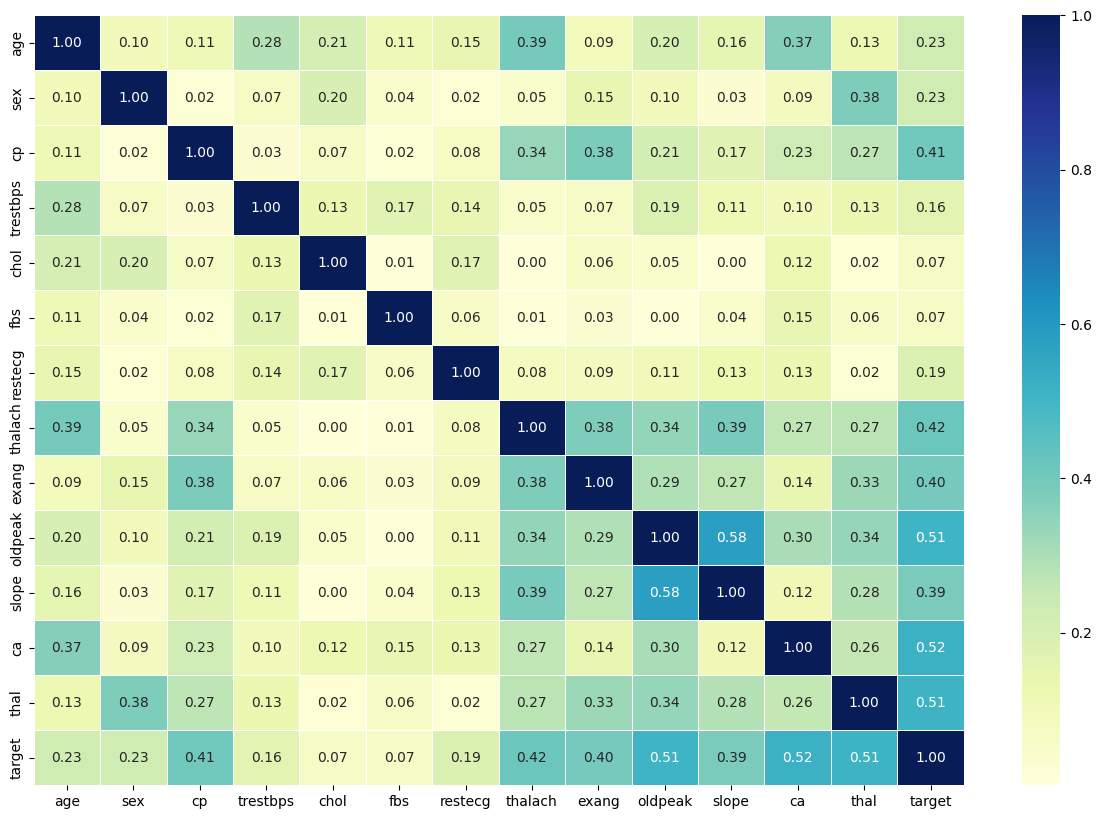

In [21]:
corr_matrix = dataset.corr('pearson').abs()   
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

---
#### Exigence 14 [1p]
Extrayez et affichez les 3 attributs les plus fortement corrélés avec la "target". Ensuite, extrayez et affichez les 3 attributs les moins corrélés avec la "target". Ces derniers peuvent être de bons candidats pour être supprimés si nous souhaitons un jeu de données plus « léger ».

_(ASTUCE : Utilisez la valeur absolue de la corrélation, car les corrélations négatives avec des valeurs absolues élevées sont aussi considérées comme « fortes »)._


In [18]:
corr_matrix = dataset.corr().abs()
most_correlated_columns = corr_matrix.target.sort_values(ascending=False)
print("Les 3 attributs les plus fortement corrélés avec la \"target\": ")
print(most_correlated_columns[1:4])

print("Les 3 attributs les moins corrélés avec la \"target\": ")
print(most_correlated_columns[most_correlated_columns.size-3:most_correlated_columns.size])




Les 3 attributs les plus fortement corrélés avec la "target": 
ca         0.520107
thal       0.509685
oldpeak    0.508330
Name: target, dtype: float64
Les 3 attributs les moins corrélés avec la "target": 
trestbps    0.159978
chol        0.070315
fbs         0.065937
Name: target, dtype: float64


---
#### Exigence 15 [0.5p]
Utilisez _seaborn_ pour tracer un graphique combiné illustrant comment chaque paire d’attributs varie l’un par rapport à l’autre.  
Concrètement, chaque paire d'attributs sera affichée avec les valeurs du premier attribut sur une axe et celles du second sur l’autre.

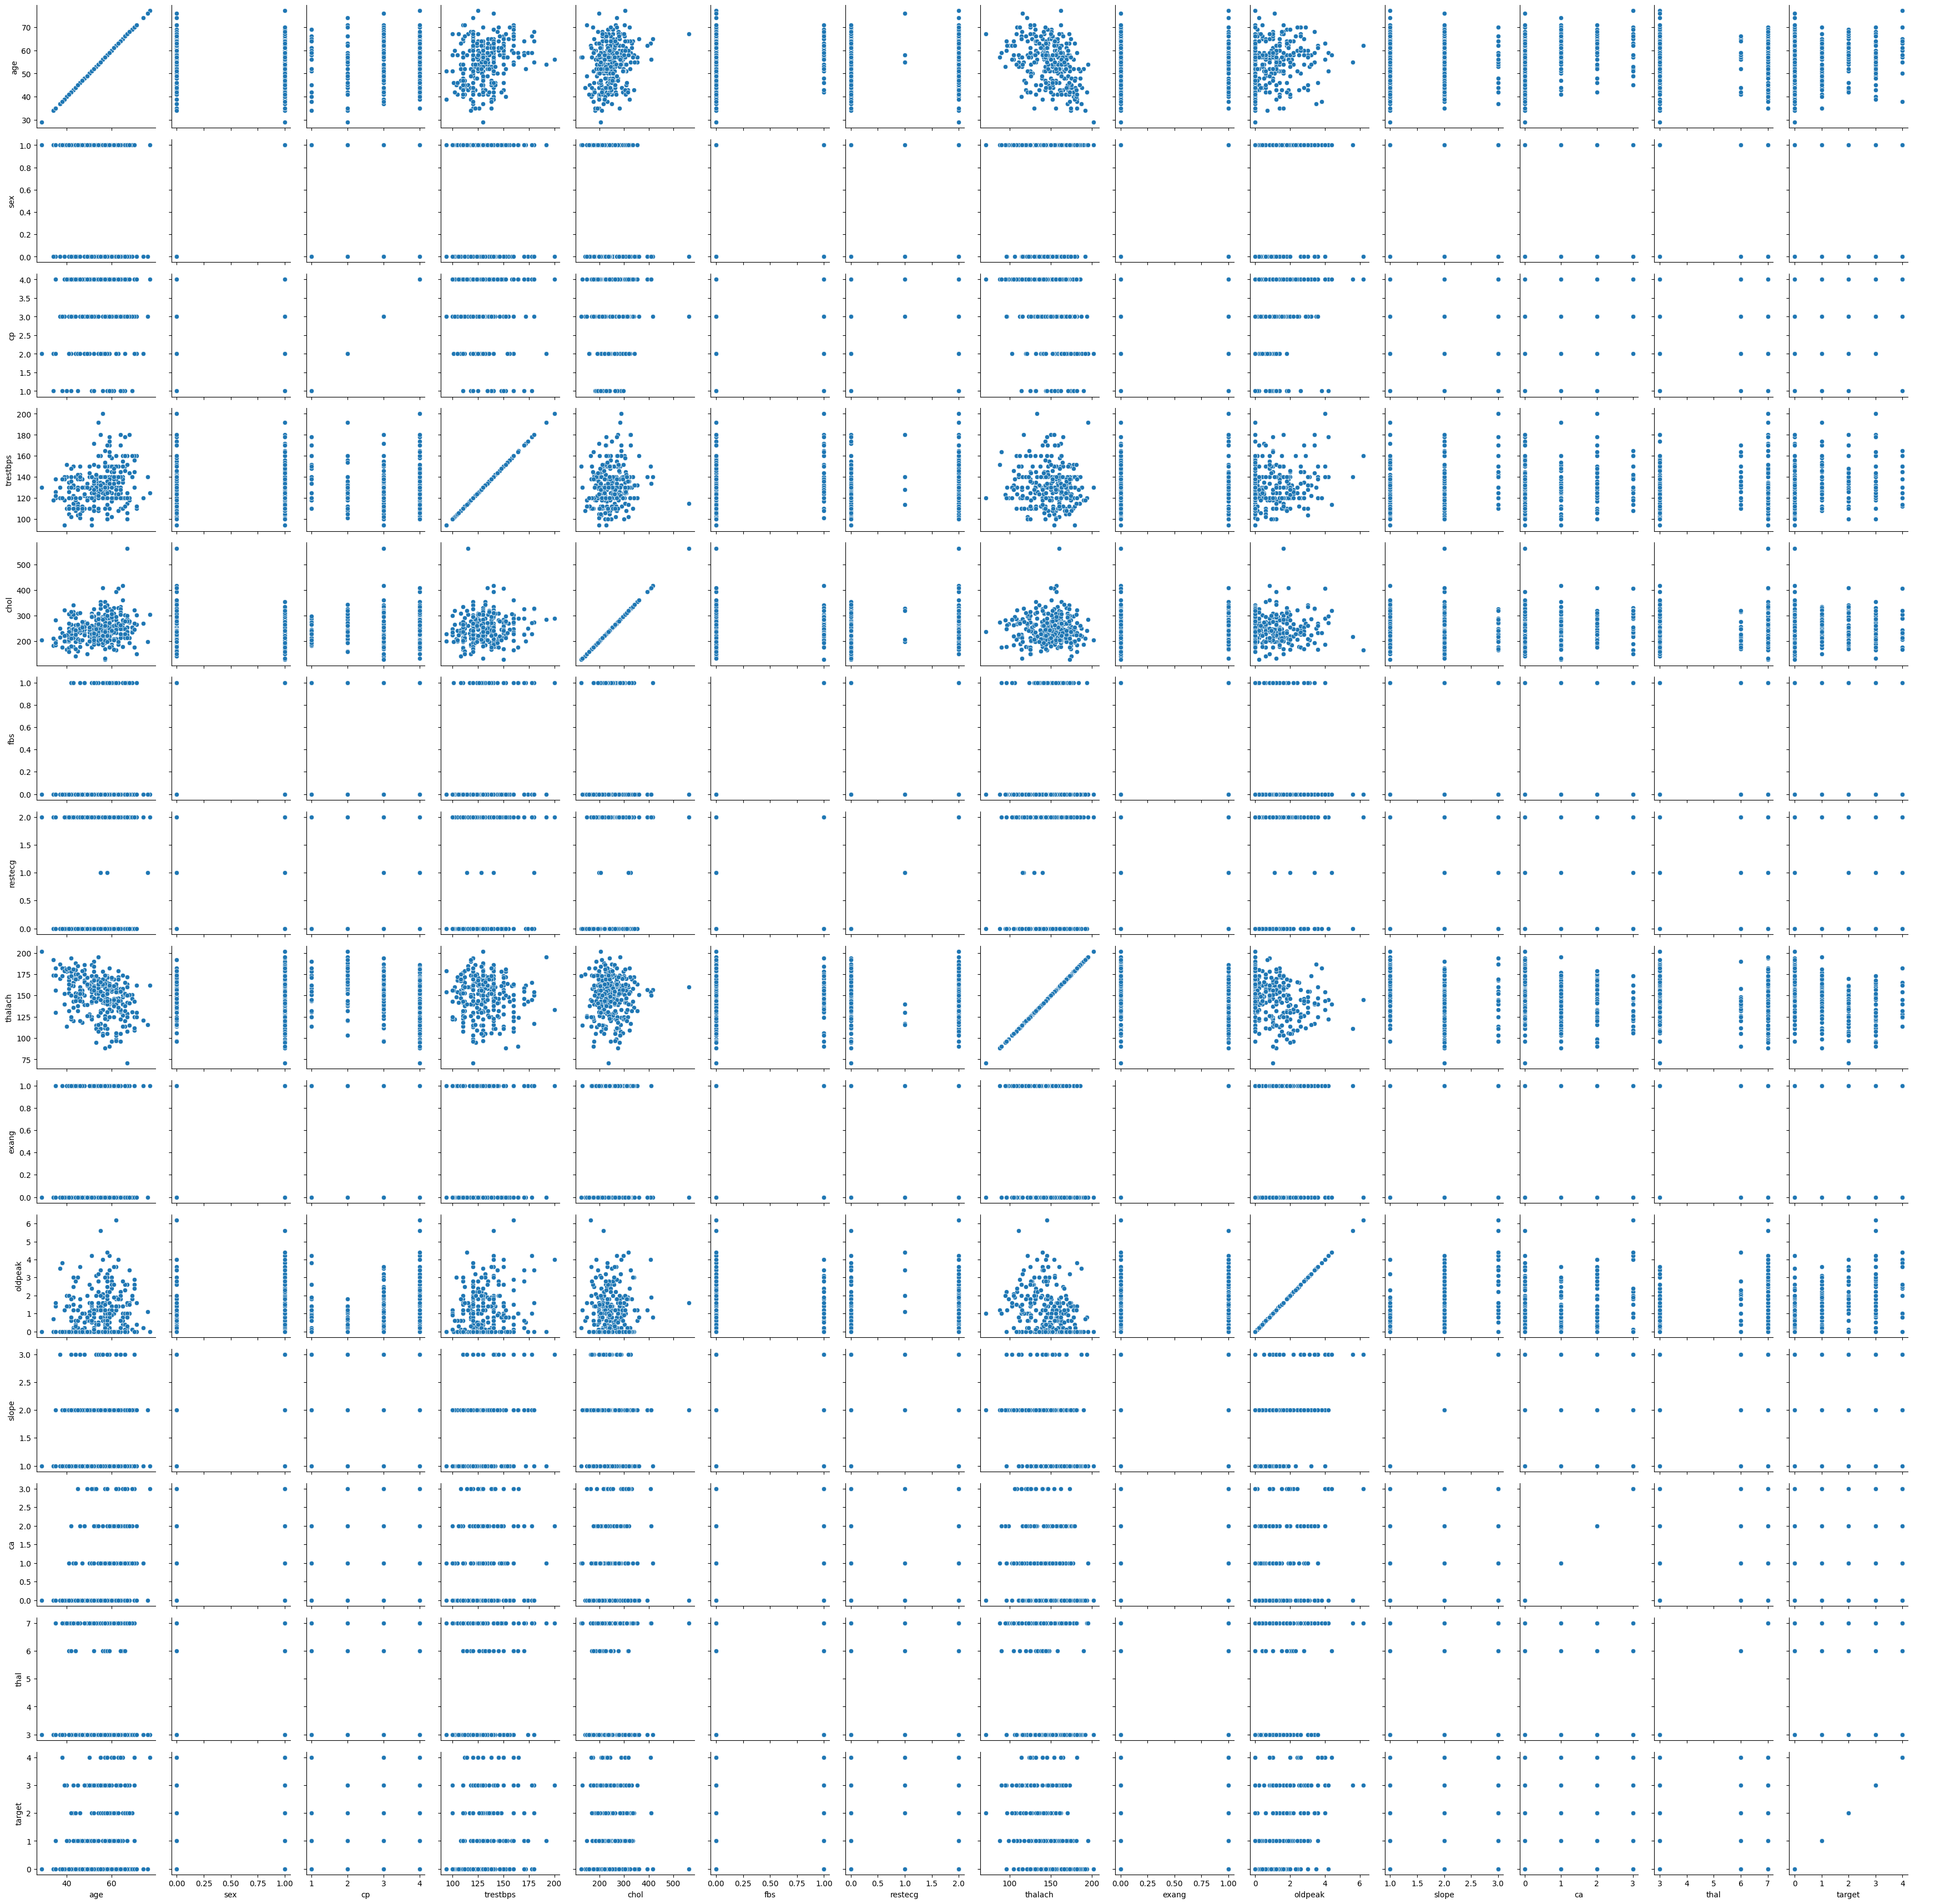

In [19]:
g = sns.PairGrid(dataset)
g.map(sns.scatterplot)
g.add_legend()

---
#### Exigence 16 [0.5p]
Le _boxplot_ est un type de graphique permettant de visualiser rapidement :
* la moyenne,
* la valeur minimale,
* la valeur maximale,
* les quartiles (25% et 75%),
* les valeurs aberrantes (_outliers_) qui s'écartent de plus de 3 écarts types de la moyenne.

Réalisez un _boxplot_ pour les colonnes _trestbps, chol_ et _thalach_. Commentez sur le graphique pour expliquer la signification de chaque élément affiché.

<Axes: >

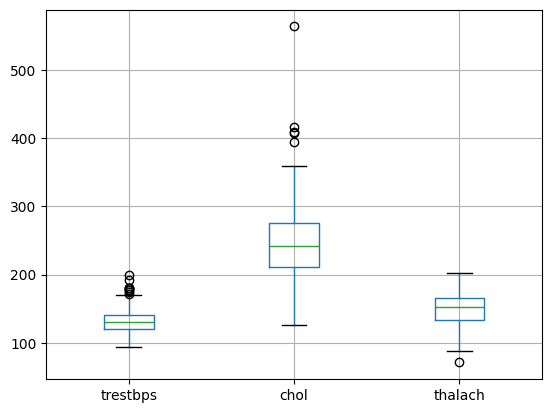

In [20]:
# TODO 16
dataset.boxplot(column=['trestbps', 'chol', 'thalach'],)